In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import seaborn as sns

from names_dataset import NameDataset

In [3]:
pd.options.display.max_seq_items = 2000
pd.options.display.max_columns = 500
pd.options.display.max_rows = 800
pd.options.display.max_colwidth = 200
pd.options.display.width = 800

In [4]:
os.getcwd()

'/Users/francesco/REPOS/nam-nat-CNN-clf/notebooks'

In [5]:
base_url = '/Users/francesco/REPOS/nam-nat-CNN-clf/app'

In [6]:
os.chdir(base_url)

In [7]:
from utils.dev_utils import load_raw_data
from utils.prod_utils import remove_digits_punctuation_doublespaces

In [8]:
nd = NameDataset()

In [9]:
country_codes = nd.get_country_codes(alpha_2=True)
print(country_codes)
country_mapping = {}
for country_code in country_codes:
    country_name = pycountry.countries.get(alpha_2=country_code).name
    country_mapping[country_code] = country_name

country_mapping

['AE', 'AF', 'AL', 'AO', 'AR', 'AT', 'AZ', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BN', 'BO', 'BR', 'BW', 'CA', 'CH', 'CL', 'CM', 'CN', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FR', 'GB', 'GE', 'GH', 'GR', 'GT', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LT', 'LU', 'LY', 'MA', 'MD', 'MO', 'MT', 'MU', 'MV', 'MX', 'MY', 'NA', 'NG', 'NL', 'NO', 'OM', 'PA', 'PE', 'PH', 'PL', 'PR', 'PS', 'PT', 'QA', 'RS', 'RU', 'SA', 'SD', 'SE', 'SG', 'SI', 'SV', 'SY', 'TM', 'TN', 'TR', 'TW', 'US', 'UY', 'YE', 'ZA']


{'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AL': 'Albania',
 'AO': 'Angola',
 'AR': 'Argentina',
 'AT': 'Austria',
 'AZ': 'Azerbaijan',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia, Plurinational State of',
 'BR': 'Brazil',
 'BW': 'Botswana',
 'CA': 'Canada',
 'CH': 'Switzerland',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CO': 'Colombia',
 'CR': 'Costa Rica',
 'CY': 'Cyprus',
 'CZ': 'Czechia',
 'DE': 'Germany',
 'DJ': 'Djibouti',
 'DK': 'Denmark',
 'DZ': 'Algeria',
 'EC': 'Ecuador',
 'EE': 'Estonia',
 'EG': 'Egypt',
 'ES': 'Spain',
 'ET': 'Ethiopia',
 'FI': 'Finland',
 'FJ': 'Fiji',
 'FR': 'France',
 'GB': 'United Kingdom',
 'GE': 'Georgia',
 'GH': 'Ghana',
 'GR': 'Greece',
 'GT': 'Guatemala',
 'HK': 'Hong Kong',
 'HN': 'Honduras',
 'HR': 'Croatia',
 'HT': 'Haiti',
 'HU': 'Hungary',
 'ID': 'Indonesia',
 'IE': 'Ireland',
 'IL': 'Israel',
 'IN': 'India

In [27]:
subset = ("ES", "IT", "FR", "DE", "GB")
europe = dict(filter(lambda i:i[0] in subset, country_mapping.items()))
print(europe)


{'DE': 'Germany', 'ES': 'Spain', 'FR': 'France', 'GB': 'United Kingdom', 'IT': 'Italy'}


In [38]:
entries = []
for key, value in europe.items():
    print(key)
    result_male = nd.get_top_names(n=2000, gender="Male", country_alpha2=key)
    for name_male in result_male[key]["M"]:
        entries.append(
            {
                "Name": name_male,
                "Country": value,
                "Gender": "Male"
            }
        )
    result_female = nd.get_top_names(n=2000, gender="Female", country_alpha2=key)
    for name_female in result_female[key]["F"]:
        entries.append(
            {
                "Name": name_female,
                "Country": value,
                "Gender": "Female"
            }
        )

df = pd.DataFrame(entries)
df.shape
    

DE
ES
FR
GB
IT


(20000, 3)

In [39]:
df.head()

,Name,Country,Gender
0,Michael,Germany,Male
1,Thomas,Germany,Male
2,Andreas,Germany,Male
3,Christian,Germany,Male
4,Stefan,Germany,Male


In [40]:
print(df.isna().sum())

Name       0
Country    0
Gender     0
dtype: int64


Male      10000
Female    10000
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

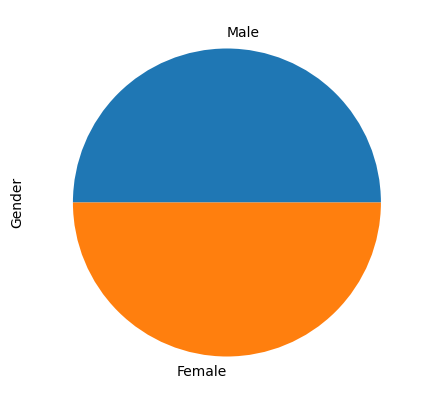

In [41]:
print(df["Gender"].value_counts())
df["Gender"].value_counts().plot(kind='pie', figsize=(5,5))

Germany           4000
Spain             4000
France            4000
United Kingdom    4000
Italy             4000
Name: Country, dtype: int64


<AxesSubplot:ylabel='Country'>

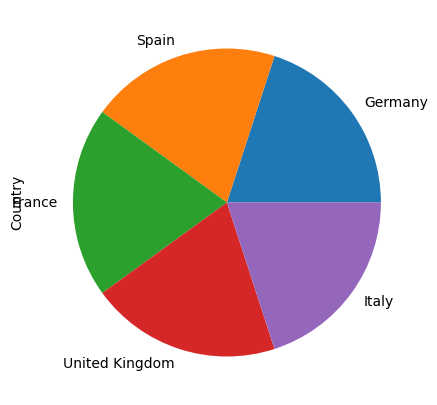

In [42]:
print(df["Country"].value_counts())
df["Country"].value_counts().plot(kind='pie', figsize=(5,5))

In [43]:
grouped = df.groupby("Country")
result = []
for gen, group in grouped:
    print(gen)
    #print(group["gender"].value_counts(sort=False))
    frame = group["Gender"].value_counts(sort=False)
    print("frame = ", frame)
    print("---")
    result.append({
        "Country": gen, 
        "Female" : group["Gender"].value_counts().values[0],
        "Male" : group["Gender"].value_counts().values[1],
        #"Neutral" : group["Gender"].value_counts().values[2],
        })
    #print(result)

result_df = pd.DataFrame(result)
result_df
    #print(gen)
    #print(group["gender"].value_counts())
    

France
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---
Germany
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---
Italy
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---
Spain
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---
United Kingdom
frame =  Male      2000
Female    2000
Name: Gender, dtype: int64
---


,Country,Female,Male
0,France,2000,2000
1,Germany,2000,2000
2,Italy,2000,2000
3,Spain,2000,2000
4,United Kingdom,2000,2000


<AxesSubplot:xlabel='Country', ylabel='Count'>

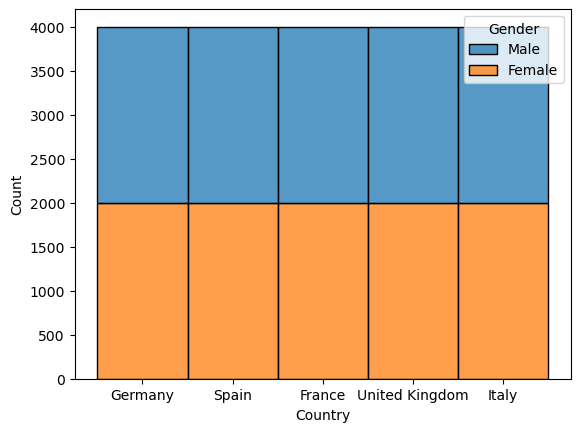

In [44]:
sns.histplot(data=df, x="Country", hue="Gender", multiple="stack")

In [45]:
dups_name = df.pivot_table(columns=['Name'], aggfunc='size')
print(len(dups_name))

14365
